# 4-10 Coding Etiquette and Excel Reporting

## Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

## Importing Data Sets

In [2]:
path=r'C:\Users\sasze\Documents\Careerfoundry Data Analytics\Achievement 4'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [4]:
df.shape

(32641268, 29)

In [5]:
df.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
first_order                   bool
product_id                 float64
product_name              category
department_id              float64
prices                     float64
busiest day               category
busiest days              category
busiest_period_of_day     category
max_order                    int16
loyalty_flag                object
spending                   float16
spending_flag             category
frequency                   uint16
frequency_flag              object
surname                     object
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income                       int64
_merge              

In [6]:
df.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,product_name,department_id,...,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196.0,Soda,7.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## Security Implications

Information like surname, age, number of dependants, family status, and income are all PII and should be treated with the proper security protocols.

## Comparing customer behavior in different geographic areas

In [7]:
#Create Column that divides states by region
region =[]

for state in df['state']:
    if (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri') or (state == 'Kansas'):
        region.append('Midwest')
    elif (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state =='New Jersey'):
        region.append('Northeast')
    elif (state == 'Deleware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        region.append('South')
    else:
        region.append('West')

In [8]:
#Create the region column
df['region'] = region

In [9]:
df['region'].value_counts()

South        10229198
West          8994703
Midwest       7652535
Northeast     5764832
Name: region, dtype: int64

In [10]:
#Check to make sure regions match with total number
len(df['state'])

32641268

In [11]:
10229198+8994703+7652535+5764832

32641268

In [13]:
#change dtype of region to category
df['region'] = df['region'].astype('category')

In [14]:
#Create crosstab of spending habits between the different U.S. regions
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [15]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,157347,7495188
Northeast,109140,5655692
South,194955,10034243
West,178558,8816145


In [16]:
#Check high spending percentage in the different regions
7495188+157347

7652535

In [17]:
Midwest=(157347/7652535)*100

In [18]:
Midwest

2.05614218033632

In [19]:
5655692+109140

5764832

In [20]:
Northeast=(109140/5764832)*100

In [21]:
Northeast

1.893203479303473

In [22]:
10034243+194955

10229198

In [23]:
South=(194955/10229198)*100

In [24]:
South

1.9058678891541645

In [25]:
8816145+178558

8994703

In [26]:
West=(178558/8994703)*100

In [27]:
West

1.985146146570932

All four regions have similar spending rates with the Midwest having the highest at 2.1% and the Northeast having the least at 1.9%.

## Create an exclusion flag for low-activity customers

In [28]:
#Creating a dataframe excluding customers with less than 5 orders
df_high = df[df['max_order'] >=5]

In [29]:
df_high.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,product_name,department_id,...,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
0,2539329,1,1,2,8,NaN,True,196.0,Soda,7.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,True,14084.0,Organic Unsweetened Vanilla Almond Milk,16.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,True,12427.0,Original Beef Jerky,19.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,True,26088.0,Aged White Cheddar Popcorn,19.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,True,26405.0,XL Pick-A-Size Paper Towel Rolls,17.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [30]:
#Check to make sure new dataframe has no less than 5 orders
df_high['max_order'].min()

5

In [31]:
# Creating a dataframe for customers with less than 5 orders
df_low = df[df['max_order'] <5]

In [32]:
df_low.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,product_name,department_id,...,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
402,2086598,6,1,5,18,NaN,True,27521.0,Organic Lacinato (Dinosaur) Kale,4.0,...,Blevins,Female,Colorado,48,7/30/2018,1,married,116041,both,West
403,2086598,6,1,5,18,NaN,True,38293.0,Ground Turkey Breast,12.0,...,Blevins,Female,Colorado,48,7/30/2018,1,married,116041,both,West
404,2086598,6,1,5,18,NaN,True,21903.0,Organic Baby Spinach,4.0,...,Blevins,Female,Colorado,48,7/30/2018,1,married,116041,both,West
405,2086598,6,1,5,18,NaN,True,48679.0,Organic Garnet Sweet Potato (Yam),4.0,...,Blevins,Female,Colorado,48,7/30/2018,1,married,116041,both,West
406,298250,6,2,4,16,6.0,False,38293.0,Ground Turkey Breast,12.0,...,Blevins,Female,Colorado,48,7/30/2018,1,married,116041,both,West


In [33]:
#Checking to make sure low dataframe has no more than 4 max orders
df_low['max_order'].max()

4

##  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

In [34]:
#List of all potential variables
df_high.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
first_order                   bool
product_id                 float64
product_name              category
department_id              float64
prices                     float64
busiest day               category
busiest days              category
busiest_period_of_day     category
max_order                    int16
loyalty_flag                object
spending                   float16
spending_flag             category
frequency                   uint16
frequency_flag              object
surname                     object
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income                       int64
_merge              

In [35]:
#Creating crosstabs to find correlations between different segments of population
df_high['spending_flag'].value_counts()

Low Spender     31306259
High Spender      623720
Name: spending_flag, dtype: int64

In [36]:
crosstab_region_spending = pd.crosstab(df['age'], df['spending_flag'], dropna = False)

In [37]:
crosstab_region_spending

spending_flag,High Spender,Low Spender
age,,
18,9901,494184
19,7238,516298
20,10466,496092
21,10792,505425
22,9297,508327
...,...,...
77,11617,494291
78,12471,486470
79,7956,525583


In [38]:
#creating age groups based on Generations (Source: https://www.beresfordresearch.com/age-range-by-generation/)
df_high.loc[df_high['age'] < 24, 'Generation'] = 'Gen_Z'
df_high.loc[(df_high['age'] >= 25) & (df_high['age'] <= 40), 'Generation'] = 'Millennials'
df_high.loc[(df_high['age'] >= 41) & (df_high['age'] <= 56), 'Generation'] = 'Gen_X'
df_high.loc[(df_high['age'] >= 57) & (df_high['age'] <= 66), 'Generation'] = 'Boomers_II'
df_high.loc[(df_high['age'] >= 67) & (df_high['age'] <= 75), 'Generation'] = 'Boomers_I'
df_high.loc[(df_high['age'] >= 76) & (df_high['age'] <= 93), 'Generation'] = 'Post_War'
df_high.loc[df_high['age'] >= 94, 'Generation'] = 'WW_II'

C:\Users\sasze\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\sasze\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\sasze\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [39]:
df_high['Generation'].value_counts()

Gen_X          8046389
Millennials    7975166
Boomers_II     4883081
Boomers_I      4496271
Gen_Z          3020721
Post_War       3006504
Name: Generation, dtype: int64

In [40]:
#Verifing proper attachment
len(df_high['Generation'])

31929979

In [41]:
len(df_high['age'])

31929979

In [42]:
#Create Crosstab between generations and spending flags
crosstab_generation_spending = pd.crosstab(df_high['Generation'], df_high['spending_flag'], dropna = False)

In [43]:
crosstab_generation_spending

spending_flag,High Spender,Low Spender
Generation,,
Boomers_I,80735,4415536
Boomers_II,97616,4785465
Gen_X,165675,7880714
Gen_Z,54788,2965933
Millennials,148426,7826740
Post_War,62363,2944141


In [45]:
#Export crosstab to Excel
crosstab_generation_spending.to_clipboard()

In [46]:
#Exploring correlation with regards to family status
df_high['fam_status'].value_counts()

married                             22421852
single                               5248979
divorced/widowed                     2730548
living with parents and siblings     1528600
Name: fam_status, dtype: int64

In [47]:
crosstab_fam_generation = pd.crosstab(df_high['Generation'], df_high['fam_status'], dropna = False)

In [48]:
crosstab_fam_generation

fam_status,divorced/widowed,living with parents and siblings,married,single
Generation,,,,
Boomers_I,1109485,0,3386786,0
Boomers_II,873372,0,3613786,395923
Gen_X,0,0,6058337,1988052
Gen_Z,0,1528600,756957,735164
Millennials,0,0,5961077,2014089
Post_War,747691,0,2258813,0


In [49]:
crosstab_fam_generation.to_clipboard()

In [50]:
#Exploring correlation between generations and deparment ID 
crosstab_gen_dept = pd.crosstab(df_high['Generation'], df_high['department_id'], dropna = False)

In [51]:
crosstab_gen_dept

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
Generation,,,,,,,,,,,,,,,,,,,,,
Boomers_I,307309,4812,159608,1312184,20286,36077,373818,13239,119197,4736,...,98530,258463,94829,146189,749183,102742,57365,393455,144615,9298
Boomers_II,334848,5530,176194,1421854,23079,39940,405533,13905,128583,5084,...,107035,281744,104546,159335,803713,109137,63498,431472,158242,10056
Gen_X,549676,8890,291023,2332542,36797,66261,667425,24243,213368,8597,...,173365,463095,175182,261902,1331158,182087,107814,712039,258645,17090
Gen_Z,205707,3473,107860,879504,15930,25396,244903,9626,80298,3305,...,65968,172812,66493,97761,502790,67356,39105,267745,96964,6714
Millennials,540957,8911,285819,2325309,37557,66334,651409,22837,210428,8484,...,170778,454445,170928,261439,1328110,178714,103772,713375,257632,16671
Post_War,207573,3248,108693,874014,13474,24913,248720,9618,79511,3292,...,65816,171298,64924,97396,494667,68183,38456,269088,96876,6191


In [52]:
crosstab_gen_dept.to_clipboard()

In [53]:
#Exploring correlation between generations and number of dependents
crosstab_gen_ndep = pd.crosstab(df_high['Generation'], df_high['n_dependants'], dropna = False)
print(crosstab_gen_ndep)
crosstab_gen_ndep.to_clipboard()

n_dependants        0        1        2        3
Generation                                      
Boomers_I     1109485  1113755  1148015  1125016
Boomers_II    1269295  1172034  1202706  1239046
Gen_X         1988052  2050512  1981578  2026247
Gen_Z          735164   773121   742993   769443
Millennials   2014089  1963147  2015333  1982597
Post_War       747691   752664   762021   744128


In [55]:
#Exploring correlation between generations and purchase days
crosstab_gen_day = pd.crosstab(df_high['Generation'], df_high['orders_day_of_week'], dropna = False)
print(crosstab_gen_day)
crosstab_gen_day.to_clipboard()

orders_day_of_week        0        1        2       3       4        5  \
Generation                                                               
Boomers_I            855480   775125   587671  537649  523753   588192   
Boomers_II           931531   853488   635377  583760  572573   629774   
Gen_X               1530724  1399589  1055290  950524  939747  1049946   
Gen_Z                575819   530420   391996  357391  353427   397195   
Millennials         1536273  1404754  1028415  942214  938520  1032607   
Post_War             581649   521553   385703  355813  348665   390123   

orders_day_of_week        6  
Generation                   
Boomers_I            628401  
Boomers_II           676578  
Gen_X               1120569  
Gen_Z                414473  
Millennials         1092383  
Post_War             422998  


In [56]:
#Creating filter for income brackets

df_high.loc[df_high['income'] < 100000, 'income_range'] = '0 - 100k'
df_high.loc[(df_high['income'] >= 100000) & (df_high['income'] < 200000), 'income_range'] = '100-200k'
df_high.loc[(df_high['income'] >= 200000) & (df_high['income'] < 300000), 'income_range'] = '200-300k'
df_high.loc[(df_high['income'] >= 300000) & (df_high['income'] < 400000), 'income_range'] = '300-400k'
df_high.loc[(df_high['income'] >= 400000) & (df_high['income'] < 500000), 'income_range'] = '400-500k'
df_high.loc[df_high['income'] >= 500000, 'income_range'] = 'Over 500k'

C:\Users\sasze\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\sasze\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\sasze\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [57]:
df_high['income_range'].value_counts()

0 - 100k     17310328
100-200k     14361871
200-300k       156413
300-400k        53847
400-500k        28313
Over 500k       19207
Name: income_range, dtype: int64

In [58]:
#Exploring correlation between generations and income
crosstab_gen_income = pd.crosstab(df_high['Generation'], df_high['income_range'], dropna = False)
print(crosstab_gen_income)
crosstab_gen_income.to_clipboard()

income_range  0 - 100k  100-200k  200-300k  300-400k  400-500k  Over 500k
Generation                                                               
Boomers_I      1337459   3116608     28150      5130      5550       3374
Boomers_II     1492031   3340550     28602     12193      5878       3827
Gen_X          2436078   5519106     58477     11731     12674       8323
Gen_Z          2927411     83777      3202      6331         0          0
Millennials    7719863    225473     13502     16328         0          0
Post_War        915966   2058554     22306      1784      4211       3683


In [59]:
# Exploring correlation between department and income
crosstab_dep_income = pd.crosstab(df_high['income_range'], df_high['department_id'], dropna = False)
print(crosstab_dep_income)
crosstab_dep_income.to_clipboard()

department_id     1.0    2.0     3.0      4.0    5.0     6.0      7.0    8.0   \
income_range                                                                    
0 - 100k       1167079  19220  608641  4959611  78320  139880  1481759  49347   
100-200k        993695  15703  526623  4279349  64813  120980  1126527  44233   
200-300k         12221    297    7803    29417   3348    1176    15460   1138   
300-400k          4516    114    2836    10868   1364     444     4889    320   
400-500k          2056     49    1274     5364    854     252     2751    280   
Over 500k         1220     20     806     4251    610     188     1728    152   

department_id    9.0    10.0  ...    12.0    13.0    14.0    15.0     16.0  \
income_range                  ...                                            
0 - 100k       442376  19559  ...  348872  970085  383038  543084  2835755   
100-200k       396017  14425  ...  337579  844977  298040  488888  2412273   
200-300k         4123     22  ...    38

In [61]:
#Exploring correlation between department and time of order
crosstab_dep_time = pd.crosstab(df_high['order_hour_of_day'], df_high['department_id'], dropna = False)
print(crosstab_dep_time)
crosstab_dep_time.to_clipboard()

department_id        1.0   2.0    3.0     4.0    5.0    6.0     7.0   8.0   \
order_hour_of_day                                                            
0                   15220   244   7147   66779    482   1847   17093   667   
1                    8687   134   3667   34296    299    993    9783   422   
2                    5273   117   2340   19554    252    583    6033   251   
3                    3997    69   1786   14070    185    495    4600   256   
4                    4067    63   1870   14999    185    446    4717   273   
5                    6334   100   3038   26444    265    685    7270   314   
6                   19006   314  10620   86088    673   2199   22631   965   
7                   55754   890  33569  264933   2079   6320   67814  2432   
8                  103008  1778  62583  503003   5178  12388  137809  4410   
9                  143704  2592  87236  702055  10121  18121  215383  6239   
10                 165909  2900  96189  785487  13084  22112  24

In [62]:
# Exploring correlation between region and generation
crosstab_reg_gen = pd.crosstab(df_high['region'], df_high['Generation'], dropna = False)
print(crosstab_reg_gen)
crosstab_reg_gen.to_clipboard()

Generation  Boomers_I  Boomers_II    Gen_X   Gen_Z  Millennials  Post_War
region                                                                   
Midwest       1044406     1136911  1929636  709371      1856886    701641
Northeast      802021      877623  1406815  538022      1394242    535384
South         1382905     1538481  2469547  964928      2529973    954281
West          1266939     1330066  2240391  808400      2194065    815198


In [63]:
#Creating filter for parental status
df_high.loc[df_high['n_dependants'] > 0, 'parental_status'] = 'Parent'
df_high.loc[df_high['n_dependants'] <= 0, 'parental_status'] = 'Not Parent'

C:\Users\sasze\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\sasze\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\sasze\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [64]:
#Checking values of parental status flag
df_high['parental_status'].value_counts()

Parent        23950452
Not Parent     7979527
Name: parental_status, dtype: int64

In [65]:
#Exploring correlation between region and parental status
crosstab_reg_par = pd.crosstab(df_high['region'], df_high['parental_status'], dropna = False)
print(crosstab_reg_par)
crosstab_reg_par.to_clipboard()

parental_status  Not Parent   Parent
region                              
Midwest             1878278  5608578
Northeast           1397526  4239684
South               2493145  7512673
West                2210578  6589517


In [66]:
#Exploring correlation between parental status and generation
crosstab_gen_par = pd.crosstab(df_high['parental_status'], df_high['Generation'], dropna = False)
print(crosstab_gen_par)
crosstab_gen_par.to_clipboard()

Generation       Boomers_I  Boomers_II    Gen_X    Gen_Z  Millennials  \
parental_status                                                         
Not Parent         1109485     1269295  1988052   735164      2014089   
Parent             3386786     3613786  6058337  2285557      5961077   

Generation       Post_War  
parental_status            
Not Parent         747691  
Parent            2258813  


In [67]:
#Exploring correlation between income range and frequency buying
crosstab_income_freq = pd.crosstab(df_high['income_range'], df_high['frequency_flag'], dropna = False)
print(crosstab_income_freq)
crosstab_income_freq.to_clipboard()

frequency_flag  Frequent customer  Non-frequent customer  Regular customer
income_range                                                              
0 - 100k                 11576830                1854066           3879432
100-200k                  9705516                1459268           3197087
200-300k                   113124                  10636             32653
300-400k                    39549                   4163             10135
400-500k                    19478                   2025              6810
Over 500k                   13593                   1122              4492


In [68]:
# Exploring correlation between income range and region
crosstab_income_reg = pd.crosstab(df_high['region'], df_high['income_range'], dropna = False)
print(crosstab_income_reg)
crosstab_income_reg.to_clipboard()

income_range  0 - 100k  100-200k  200-300k  300-400k  400-500k  Over 500k
region                                                                   
Midwest        3990932   3430730     34087     14482      8982       7643
Northeast      3044921   2551489     25196      8850      3334       3420
South          5488983   4437443     48809     18835      7898       3850
West           4785492   3942209     48321     11680      8099       4294


In [69]:
# Exploring correlation between department and region
crosstab_dept_reg = pd.crosstab(df_high['department_id'], df_high['region'], dropna = False)
print(crosstab_dept_reg)
crosstab_dept_reg.to_clipboard()

region         Midwest  Northeast    South     West
department_id                                      
1.0             511735     381216   688056   599780
2.0               8190       6439    11291     9483
3.0             268083     204098   357663   318139
4.0            2183452    1631097  2915692  2558619
5.0              35158      25821    47248    41082
6.0              62255      45816    82128    72721
7.0             612866     473674   826928   719646
8.0              21874      18217    28577    26802
9.0             198790     148090   264146   234342
10.0              8070       5705    10578     9658
11.0            103262      76820   136944   119369
12.0            162437     121691   217073   191477
13.0            431789     321348   571624   506362
14.0            160140     120756   215398   191365
15.0            244248     181990   326195   288738
16.0           1239389     935171  1658103  1460082
17.0            171648     128224   222117   198098
18.0        

In [70]:
#Exploring correlation between Generation and loyalty
crosstab_gen_loyal = pd.crosstab(df_high['Generation'], df_high['loyalty_flag'], dropna = False)
print(crosstab_gen_loyal)
crosstab_gen_loyal.to_clipboard()

loyalty_flag  Loyal customer  New customer  Regular customer
Generation                                                  
Boomers_I            1527481        685106           2283684
Boomers_II           1644605        755398           2483078
Gen_X                2694928       1228484           4122977
Gen_Z                1020170        460335           1540216
Millennials          2634099       1202521           4138546
Post_War              996794        458191           1551519


In [71]:
#Exploring correlation between region and loyalty
crosstab_reg_loyal = pd.crosstab(df_high['region'], df_high['loyalty_flag'], dropna = False)
print(crosstab_reg_loyal)
crosstab_reg_loyal.to_clipboard()

loyalty_flag  Loyal customer  New customer  Regular customer
region                                                      
Midwest              2461962       1145203           3879691
Northeast            1905685        856916           2874609
South                3335405       1523600           5146813
West                 2976526       1343210           4480359


In [77]:
#Exploring correlation between income range and frequency buying

crosstab_tod_prange = pd.crosstab(df_high['order_hour_of_day'], df_high['spending_flag'], dropna = False)
print(crosstab_tod_prange)
crosstab_tod_prange.to_clipboard()

spending_flag      High Spender  Low Spender
order_hour_of_day                           
0                          3635       211178
1                          2180       111571
2                          1773        66381
3                          1179        49351
4                          1322        51123
5                          2037        84877
6                          6686       281440
7                         18316       865107
8                         31641      1669025
9                         46505      2379582
10                        55582      2669896
11                        54529      2641300
12                        50645      2524256
13                        49307      2571404
14                        51541      2597649
15                        53514      2566191
16                        49501      2444406
17                        42627      2009803
18                        31759      1575387
19                        23674      1213905
20        

In [79]:
df_high_spend =  df_high[df_high['spending_flag']=='High Spender']

In [80]:
#Exploring correlation between order time of day and price range

crosstab_tod_prange_high = pd.crosstab(df_high['order_hour_of_day'], df_high_spend['spending_flag'], dropna = False)
print(crosstab_tod_prange_high)
crosstab_tod_prange_high.to_clipboard()

spending_flag      High Spender  Low Spender
order_hour_of_day                           
0                          3635            0
1                          2180            0
2                          1773            0
3                          1179            0
4                          1322            0
5                          2037            0
6                          6686            0
7                         18316            0
8                         31641            0
9                         46505            0
10                        55582            0
11                        54529            0
12                        50645            0
13                        49307            0
14                        51541            0
15                        53514            0
16                        49501            0
17                        42627            0
18                        31759            0
19                        23674            0
20        

In [81]:
#Exploring correlation between order day of week and price range
crosstab_dow_prange_high = pd.crosstab(df_high['orders_day_of_week'], df_high_spend['spending_flag'], dropna = False)
print(crosstab_dow_prange_high)
crosstab_dow_prange_high.to_clipboard()

spending_flag       High Spender  Low Spender
orders_day_of_week                           
0                         104629            0
1                         112410            0
2                          85145            0
3                          78745            0
4                          77326            0
5                          85960            0
6                          79505            0


In [82]:
#Exploring correlation between region and spending
crosstab_reg_pran = pd.crosstab(df_high['region'], df_high['spending_flag'], dropna = False)
print(crosstab_reg_pran)
crosstab_reg_pran.to_clipboard()

spending_flag  High Spender  Low Spender
region                                  
Midwest              153991      7332865
Northeast            106428      5530782
South                189661      9816157
West                 173640      8626455


In [83]:
#Exploring correlation between Parental status and Spending
crosstab_parent_price = pd.crosstab(df_high['spending_flag'], df_high['parental_status'], dropna = False)
print(crosstab_parent_price)
crosstab_parent_price.to_clipboard()

parental_status  Not Parent    Parent
spending_flag                        
High Spender         150569    473151
Low Spender         7828958  23477301


## Visualizations

In [84]:
df_high.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
first_order                   bool
product_id                 float64
product_name              category
department_id              float64
prices                     float64
busiest day               category
busiest days              category
busiest_period_of_day     category
max_order                    int16
loyalty_flag                object
spending                   float16
spending_flag             category
frequency                   uint16
frequency_flag              object
surname                     object
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income                       int64
_merge              

In [85]:
crosstab_generation_spending

spending_flag,High Spender,Low Spender
Generation,,
Boomers_I,80735,4415536
Boomers_II,97616,4785465
Gen_X,165675,7880714
Gen_Z,54788,2965933
Millennials,148426,7826740
Post_War,62363,2944141


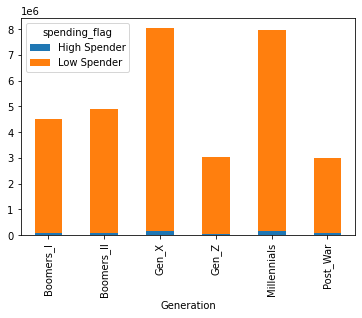

In [86]:
#Creating a bar chart of results sorted highest to lowest
crosstab_generation_spending_graph = crosstab_generation_spending.plot(kind='bar', stacked=True)

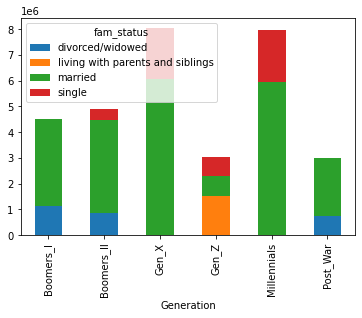

In [87]:
fam_generation_graph=crosstab_fam_generation.plot(kind='bar', stacked=True)

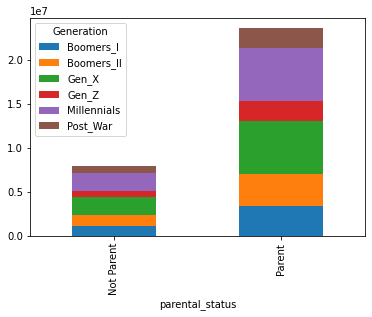

In [88]:
crosstab_gen_par_graph = crosstab_gen_par.plot(kind='bar', stacked=True)

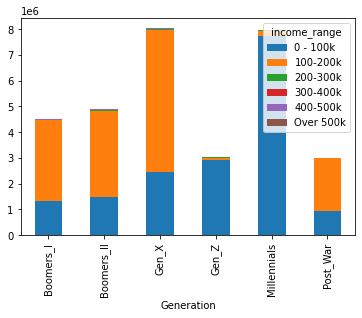

In [89]:
crosstab_gen_income_graph = crosstab_gen_income.plot(kind='bar', stacked=True)

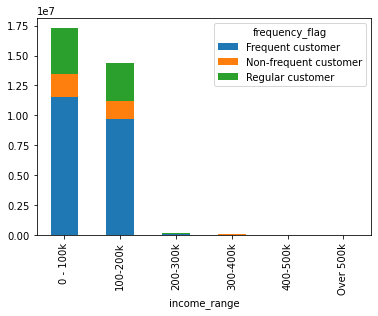

In [90]:
crosstab_income_freq_graph = crosstab_income_freq.plot(kind='bar', stacked=True)

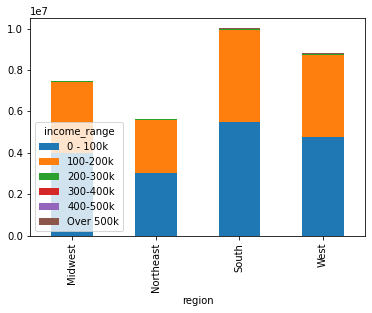

In [91]:
crosstab_income_reg_graph= crosstab_income_reg.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='region'>

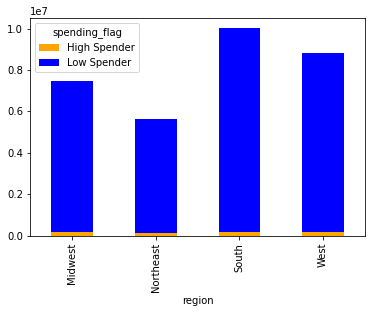

In [98]:
# Price purchases by region
crosstab_reg_pran.plot.bar(stacked = True, color = ['orange', 'blue', 'red'])

<AxesSubplot:>

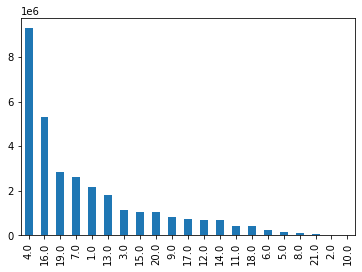

In [99]:
df_high['department_id'].value_counts().plot.bar()

<AxesSubplot:>

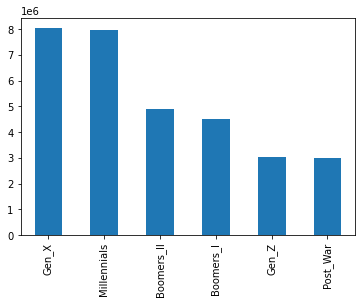

In [100]:
#breakdown of our customers by generation
df_high['Generation'].value_counts().plot.bar()

<AxesSubplot:xlabel='Generation'>

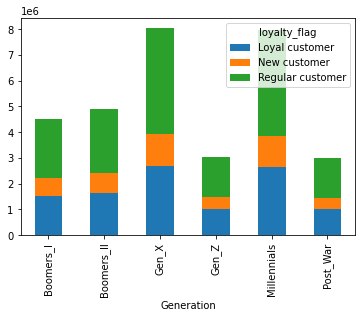

In [101]:
#Graph showing corralation between generation and loyalty
crosstab_gen_loyal.plot.bar(stacked=True)

<AxesSubplot:xlabel='spending_flag'>

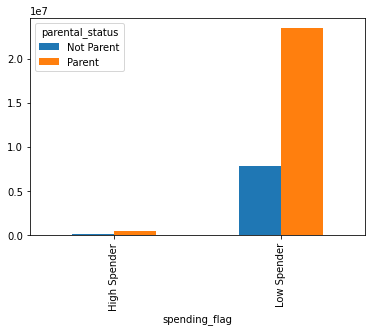

In [102]:
crosstab_parent_price.plot.bar()

<AxesSubplot:>

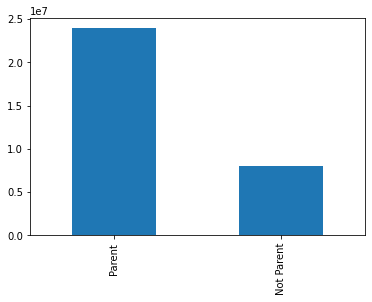

In [103]:
df_high['parental_status'].value_counts().plot.bar()

<AxesSubplot:>

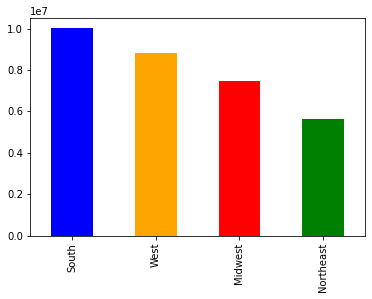

In [104]:
df_high['region'].value_counts().plot.bar(color = ['blue', 'orange', 'red', 'green'])

<AxesSubplot:xlabel='region'>

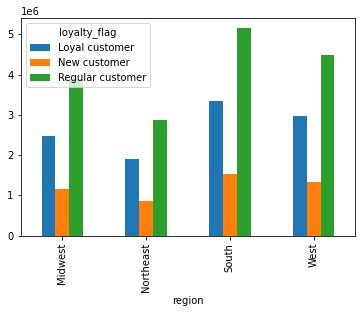

In [105]:
crosstab_reg_loyal.plot.bar()

<AxesSubplot:xlabel='region'>

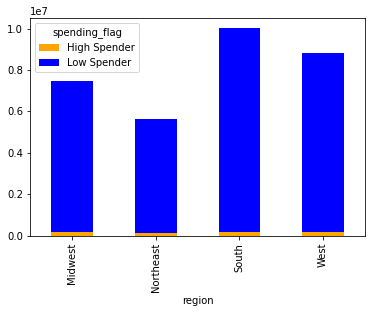

In [116]:
crosstab_reg_pran.plot.bar(stacked = True, color = ['orange', 'blue', 'red'])

## Aggregate the max, mean, and min variables on a customer-profile level

In [106]:
df_high.groupby('Generation').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
Generation                          
Boomers_I    11.559053  1.0  99999.0
Boomers_II   12.235628  1.0  99999.0
Gen_X        11.768301  1.0  99999.0
Gen_Z        12.268696  1.0  99999.0
Millennials  11.939089  1.0  99999.0
Post_War     12.097453  1.0  99999.0

In [107]:
df_high.groupby('income_range').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_range                          
0 - 100k        8.094034  1.0  99999.0
100-200k       12.171918  1.0  99999.0
200-300k      253.362402  1.0  99999.0
300-400k      306.861549  1.0  99999.0
400-500k      260.991160  1.0  99999.0
Over 500k     170.125361  1.0  99999.0

In [108]:
df_high.groupby('parental_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
parental_status                         
Not Parent       12.089298  1.0  99999.0
Parent           11.917431  1.0  99999.0

In [109]:
df_high.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.773941  1.0  99999.0
Northeast  11.530525  1.0  99999.0
South      12.091604  1.0  99999.0
West       11.394373  1.0  99999.0

## Compare your customer profiles with regions and departments.

Graphs and comparisons found in Excel file.

## Produce suitable charts to illustrate your results

Graphs and comparisons found in Excel file.

## Export Final Data

In [110]:
df_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_final.pkl'))